# DEMO 1, QUIZ 2 UTILITY FUNCTIONS

In [1]:
# window sequences to produce input/output data
def window_transform(sequence,window_size):
    # containers for input/output pairs
    X = []
    y = []
    
    # window data
    count = 0
    for t in range(len(sequence) - window_size):
        # get input sequence
        temp_in = sequence[t:t + window_size]
        X.append(temp_in)
        
        # get corresponding target
        temp_target = sequence[t + window_size]
        y.append(temp_target)
        count+=1
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),)
    
    return X,y

In [4]:
def generative_predictions(model,s_input,num_predictions): 
    testing_predictions = []
    for t in range(num_predictions):            
        s_input = np.asarray(s_input)
        s_input = np.expand_dims(s_input, axis=0)

        # compute and store prediction
        pred = model.predict(s_input)
        testing_predictions.append(pred[0])

        # kick out last entry in y_input and insert most recent prediction at front
        s_input = s_input[1:]
        s_input = np.append(s_input,pred)
    return testing_predictions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(2)

# given - build model
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

Using TensorFlow backend.


# DEMO 1:  Odd number generation using FNN

In [18]:
# build odd number sequence
s_1 = 1
num_its = 7
odd_num_sequence = []
odd_num_sequence.append(s_1)
for k in range(num_its):
    s_t_1 = odd_num_sequence[-1]
    s_t = s_t_1 + 2
    odd_num_sequence.append(s_t)
print odd_num_sequence  

[1, 3, 5, 7, 9, 11, 13, 15]


In [7]:
# window the sequence
odd_num_window_size = 1
X_odd_nums,y_odd_nums = window_transform_series(odd_num_sequence,window_size=odd_num_window_size)

In [8]:
# build FNN to perform regression on our input/output data
odd_num_model = Sequential()
layer = Dense(1, input_dim=odd_num_window_size, activation='linear')
odd_num_model.add(layer)
odd_num_model.compile(loss='mean_squared_error', optimizer=optimizer)

# run the model
odd_num_model.fit(X_odd_nums, y_odd_nums, nb_epoch=1000, batch_size=2, verbose=0)

# generate predictions for training sequence of odd numbers
train_predict = odd_num_model.predict(X_odd_nums)

# print the training data and predictions on training data
print X_odd_nums
print train_predict

In [10]:
# print the learned weights - they look quite similar to the original model!
odd_num_model.get_weights()

In [11]:
# use learned regressor as generative model
my_num = 10
odd_num_predictions = generative_predictions(model = odd_num_model,s_input = odd_num_sequence[-1],num_predictions = my_num)

# print generative predictions
print np.expand_dims(odd_num_predictions,axis = 0)

[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]]
[[  3.00071263]
 [  5.00029325]
 [  6.99987411]
 [  8.9994545 ]
 [ 10.99903488]
 [ 12.99861526]
 [ 14.99819565]]


# QUIZ 2: Recovering complex recursive sequence

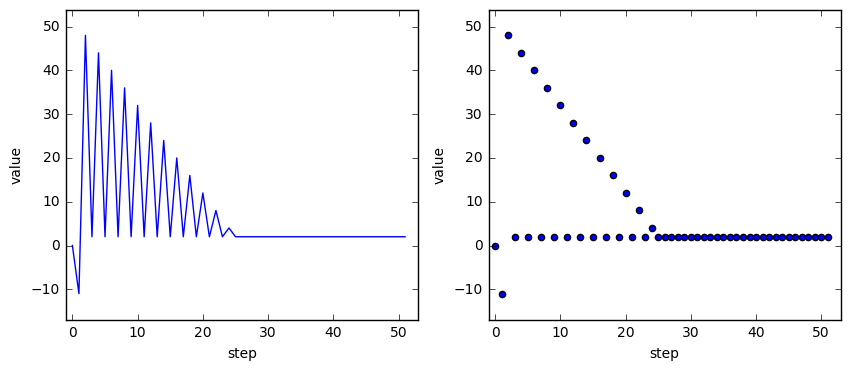

In [26]:
### Codeblock used to generate complicated sequence
import numpy as np
import matplotlib.pyplot as plt
s_1 = 0
s_2 = -11

# container for sequence
complex_sequence=[]
complex_sequence.append(s_1)
complex_sequence.append(s_2)

# loop through 50 times creating sequence elements
for t in range(50):
    s_t_minus_1 = complex_sequence[-1]
    s_t_minus_2 = complex_sequence[-2]
    s_t = 2 + np.maximum(0,2 - 4*s_t_minus_1 + s_t_minus_2)
    complex_sequence.append(s_t)

# plot the sequence 
sgap = 0.1*(max(complex_sequence)-min(complex_sequence))
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(121)
ax.plot(np.arange(len(complex_sequence)),complex_sequence)
ax.set_xlim([-1,len(complex_sequence)+1])
ax.set_ylim([min(complex_sequence)-sgap,max(complex_sequence)+sgap])
ax.set_xlabel('step')
ax.set_ylabel('value')
ax.set_title('(interpolated) plot of sequence')

ax = fig.add_subplot(122)
ax.scatter(np.arange(len(complex_sequence)),complex_sequence)
ax.set_xlabel('step')
ax.set_ylabel('value')
ax.set_xlim([-1,len(complex_sequence)+1])
ax.set_ylim([min(complex_sequence)-sgap,max(complex_sequence)+sgap])
ax.set_title('scatter plot of sequence')
plt.show()

In [17]:
# window the sequence to create input/output pairs
comoplex_num_window_size = 2
X_complex,y_complex = window_transform_series(complex_sequence,window_size=comoplex_num_window_size)

In [18]:
# create model
complex_model = Sequential()
complex_model.add(Dense(1, input_dim=comoplex_num_window_size, activation='relu'))
complex_model.add(Dense(1,activation='linear'))
complex_model.compile(loss='mean_squared_error', optimizer=optimizer)

# fit model
complex_model.fit(X_complex, y_complex, nb_epoch=5000, batch_size=12, verbose=0)

In [20]:
# print out the weights and biases of trained model - notice they don't match the original generating model!  Yet our trained model still fits the data well. 
weights = complex_model.layers[0].get_weights()[0]
biases = complex_model.layers[0].get_weights()[1]
print weights
print biases
print '-----------'
weights = complex_model.layers[1].get_weights()[0]
biases = complex_model.layers[1].get_weights()[1]
print weights
print biases

[[ 0.45337397]
 [-1.81397212]]
[ 0.90436655]
-----------
[[ 2.20539188]]
[ 1.99822569]


In [21]:
# Make predictions on training set
train_predict = complex_model.predict(X_complex)

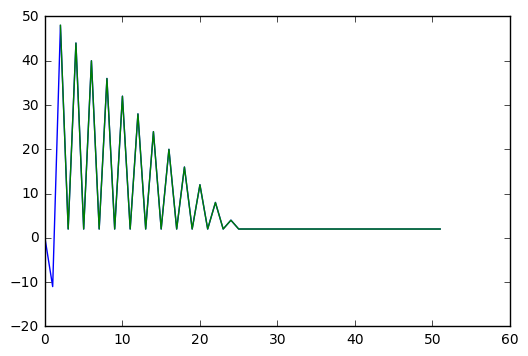

In [22]:
# plot original sequence and fit 
plt.plot(np.arange(len(complex_sequence)),complex_sequence)
plt.plot(np.arange(comoplex_num_window_size,len(complex_sequence)),train_predict)
plt.show()

# DEMO 2: learning transition probabilities of a binary markov sequence using logistic regression

In [26]:
# generate binary markov sequence of order 1
def binary_markov_maker(num_elements):
    # transition probabilities
    p00 = 0.6
    p01 = 0.4
    p10 = 0.2
    p11 = 0.8

    # generate sequence of desired length using transition probabilities
    binary_seq = [0]
    for i in range(num_elements):
        # generate random number for transition
        r = np.random.rand(1)
        
        # grab last element of sequence
        s_old = binary_seq[-1]
        
        # transition based on last element of sequence and random num
        s_new = -1
        if s_old == 0:
            if r <= p00:
                s_new = 0
            else:  
                s_new = 1
        if s_old == 1:
            if r <= p11:
                s_new = 1
            else:
                s_new = 0
                
        binary_seq.append(s_new)
    return binary_seq

In [36]:
# run the binary sequence generator
binary_seq = binary_markov_maker(num_elements = 200)

In [37]:
# generate input/output data by windowing
window_size = 1
X,y = window_transform(sequence = binary_seq,window_size=window_size)

In [38]:
# build FNN to perform logistic regression on our input/output data
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy')

# fit model
model.fit(X, y, nb_epoch=2000,verbose = 0)

In [39]:
# generate predictions for training sequence of odd numbers
train_predict = np.round(model.predict(X))

In [52]:
# compare training data to predictions
C = np.where(X == train_predict)
print str(len(C[0])) + ' of ' + str(len(X)) + ' classified correctly'

200 of 200 classified correctly


In [57]:
# print the learned weights - they look quite similar to the original model!
w = model.get_weights()

# creat / print transition probabilities
w0 = w[0][0][0]  # order of weights reversed in return
w1 = w[1][0]

p00 = 1/(1 + np.exp(w0))
p01 = np.exp(w0)/(1 + np.exp(w0))
p10 = 1/(1 + np.exp(w0+w1))
p11 = np.exp(w0+w1)/(1+np.exp(w0+w1))

# print transition probabilities
print 'predicted p00 = ' + str(p00)
print 'predicted p01 = ' + str(p01)
print 'predicted p10 = ' + str(p10)
print 'predicted p11 = ' + str(p11)

predicted p00 = 0.173785154139
predicted p01 = 0.826214845861
predicted p10 = 0.188541787568
predicted p11 = 0.811458212432


# QUIZ 4: Use logistic regression to fit a 4-integer markov chain

In [ ]:
# generate binary markov sequence of order 1
def multi_markov_maker(num_elements):
    # transition probabilities
    transition_mat = np.random.rand(4,4)
    transition_mat = [x/sum(x) for x in transition_mat]
    transition_mat = np.asarray(transition_mat)

    # generate sequence of desired length using transition probabilities
    binary_seq = [1]
    for i in range(num_elements):
        # generate random number for transition
        r = np.random.rand(1)
        
        # grab last element of sequence
        s_old = binary_seq[-1]
        
        # transition based on last element of sequence and random num
        s_new = -1
        if s_old == 1:
            
            
        elif s_old == 2:
            
            
        elif s_old == 3:
            
            
        binary_seq.append(s_new)
    return binary_seq

# QUIZ 5: Generating text

## Functions for cleaning, prediction

In [14]:
# lets define some recursive sequences
import numpy as np
import matplotlib.pyplot as plt

# window sequence
def window_transform_series(text,window_size,step_size):
    # containers for input/output pairs
    inputs = []
    outputs = []
    
    # window data
    count = 0
    for t in range(0,len(text) - window_size,step_size):
        # get input sequence
        temp_in = text[t:t + window_size]
        inputs.append(temp_in)
        
        # get corresponding target
        temp_target = text[t + window_size]
        outputs.append(temp_target)
    
    return inputs,outputs

# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size,chars):
    # number of unique chars
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_series(text,window_size,step_size)

    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs) ,num_chars*window_size), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i in range(len(outputs)):
        input_sentence = inputs[i]
        output_char = outputs[i]

        # loop over input sentence and vectorize characters
        for k in range(len(input_sentence)):
            char = input_sentence[k]
            ind = k*num_chars + chars_to_indices[char]
            X[i,ind] = 1
        y[i, chars_to_indices[output_char]] = 1
        
    return X,y

# function that uses trained model to predict a desired number of future characters
def predict_next_chars(model,input_chars,num_to_predict,chars):
    num_chars = len(chars)
    
    # create output
    predicted_chars = ''
    for i in range(num_to_predict):
        # convert this round's predicted characters to numerical input    
        x_test = np.zeros((1, window_size * len(chars)))
        for k in range(len(input_chars)):
            char = input_chars[k]
            ind =  chars_to_indices[char]
            x_test[0,k*num_chars + ind] = 1

        # make this round's prediction
        test_predict = model.predict(x_test,verbose = 0)[0]

        # translate numerical prediction back to characters
        r = np.argmax(test_predict)                           # predict class of each test input
        d = indices_to_chars[r] 

        # update predicted_chars and input
        predicted_chars+=d
        input_chars+=d
        input_chars = input_chars[1:]
    return predicted_chars

### load and clean data

In [12]:
# load clean data
text = open('datasets/holmes_cleaned.txt').read()

# print out the number of unique characters in the dataset
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")

# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

# use your function
window_size = 50
step_size = 5
num_chars = len(chars)
# sample_text = text[:100000]
X,y = encode_io_pairs(sample_text,window_size,step_size,chars)

this corpus has 32 unique characters


In [15]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

# Use keras's checkpoint module to record the best weights of our model while training
import keras.callbacks
path="best_RNN_weights.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model = Sequential()
model.add((Dense(num_chars, input_dim=num_chars*window_size,  activation='linear')))
model.add((Dense(num_chars,activation='softmax')))
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# train the model
model.fit(X, y, batch_size=24, nb_epoch=1000,verbose = 0)

In [17]:
# get an appropriately sized chunk of characters from the text
f = open('RNN_output.txt', 'w')  # create an output file to write too

start_inds = [10,100,200]
for s in start_inds:
    start_index = s
    input_chars = sample_text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100, chars=chars)

    # print out input characters
    line = '------------------'
    print(line)
    f.write(line)
        
    line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(line)
    f.write(line)

    # print out predicted characters
    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)
    f.write(line)
f.close()

------------------
input chars = 
ldom heard him mention her under any other name. i"

predicted chars = 
nd he hed, compriced orseme. my yomundi, couphe of con alked ay blo my.  ils, und wh, lyope y uny ur"

------------------
input chars = 
 the whole of her sex. it was not that he felt any"

predicted chars = 
 wancism. ham tha lw. he d gavelles you hy haspercotch im. i whath how want of tof tha d y inclupclo"

------------------
input chars = 
s, and that one particularly, were abhorrent to hi"

predicted chars = 
sbee , and ghy. wallut, my ullferiy fat yourd mono dlebyound t. theumed, ay yon moy urawe auk, ist e"



------------------
input chars = 
ldom heard him mention her under any other name. i"

predicted chars = 
n y s hod sont ee tis aren es eoeed aoe iple sinwe he ofye ti nesontcko notha hehe set intt r ti ess"

------------------
input chars = 
 the whole of her sex. it was not that he felt any"

predicted chars = 
 le. ioe iks oy ihe w athe tr aa ele sellii. it mien fagtrent am res cner y aoig oencis t ontt wos a"

------------------
input chars = 
s, and that one particularly, were abhorrent to hi"

predicted chars = 
son ad ecsei et f ts toontt os ahin  s or auetheas mant satiis te.  o trea. enton thoy  dscto pin tr"